In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator, LogLocator

# Load the JSON file
data = pd.read_json('../generated/VUEs.json')

# Convert to a DataFrame
df = pd.DataFrame(data)


# Normalize the 'revisedProteinEffects' column
normalized_dfs = []
for index, row in df.iterrows():
    normalized_row = pd.json_normalize(row['revisedProteinEffects'])
    repeated_row = pd.DataFrame([row.drop('revisedProteinEffects')] * len(normalized_row)).reset_index(drop=True)
    combined = pd.concat([repeated_row.reset_index(drop=True), normalized_row], axis=1).reset_index(drop=True)
    normalized_dfs.append(combined)

# Determine the union of all column names
all_columns = set()
for df in normalized_dfs:
    all_columns.update(df.columns)

# Reindex each DataFrame to include all columns, filling missing values with NaN
all_columns = list(all_columns)
for i, df in enumerate(normalized_dfs):
    normalized_dfs[i] = df.loc[:, ~df.columns.duplicated()].reindex(columns=all_columns)

# Concatenate all normalized DataFrames
result_df = pd.concat(normalized_dfs, ignore_index=True)
# make anything CountByVariantCount 0
count_cancer_type_columns = [col for col in result_df.columns if 'CountByCancerType' in col]
result_df[count_cancer_type_columns] = result_df[count_cancer_type_columns].fillna(0).astype(int)

In [4]:
result_df[result_df.hugoGeneSymbol == "KIT"]

,counts.mskimpact_nonsignedout.somaticVariantsCountByCancerType.Glioma,counts.mskimpact.somaticVariantsCountByCancerType.Hepatobiliary Cancer,counts.genie.somaticVariantsCountByCancerType.Hepatobiliary Cancer,counts.mskimpact_nonsignedout.somaticVariantsCountByCancerType.Sellar Tumor,counts.mskimpact.germlineVariantsCount,counts.genie.somaticVariantsCountByCancerType.Prostate Cancer,counts.genie.unknownVariantsCountByCancerType.Non-Small Cell Lung Cancer,counts.genie.somaticVariantsCountByCancerType.Small Cell Lung Cancer,counts.mskimpact.somaticVariantsCountByCancerType.Small Bowel Cancer,counts.mskimpact.germlineVariantsCountByCancerType.Breast Cancer,...,counts.mskimpact_nonsignedout.somaticVariantsCountByCancerType.Prostate Cancer,counts.mskimpact.germlineVariantsCountByCancerType.Pancreatic Cancer,counts.mskimpact.germlineVariantsCountByCancerType.Germ Cell Tumor,counts.tcga.somaticVariantsCount,counts.genie.somaticVariantsCountByCancerType.Small Bowel Cancer,counts.mskimpact.somaticVariantsCountByCancerType.Gastrointestinal Neuroendocrine Tumor,counts.mskimpact_nonsignedout.somaticVariantsCountByCancerType.Head and Neck Cancer,variant,counts.mskimpact_nonsignedout.somaticVariantsCountByCancerType.Uterine Sarcoma,counts.mskimpact_nonsignedout.somaticVariantsCountByCancerType.Small Cell Lung Cancer
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4:g.55593576_55593606del,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4:g.55593580_55593606del,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4:g.55593578_55593606del,0,0


In [5]:
# hardcoded set o fgene swith highest level (manually determined with
# mutationmapper, and just looking upn genes in OncoKB)
highest_level_per_gene = {
    "KIT": "Level 1",
    "MET": "Level 1",
    "FLT3": "Level 1",
    "ATM": "Level 1",
    "BRCA1": "Level 1",
    "BRCA2": "Level 1",
    "BRIP1": "Level 1",
    "CHEK2": "Level 1",
    "PALB2": "Level 1",
    "RAD51D": "Level 1",
    "MLH1": "Level 1",
    "EGFR": "Level 1",
}

In [26]:
result_df.columns

Index(['counts.mskimpact_nonsignedout.somaticVariantsCountByCancerType.Glioma',
       'counts.mskimpact.somaticVariantsCountByCancerType.Hepatobiliary Cancer',
       'counts.genie.somaticVariantsCountByCancerType.Hepatobiliary Cancer',
       'counts.mskimpact_nonsignedout.somaticVariantsCountByCancerType.Sellar Tumor',
       'counts.mskimpact.germlineVariantsCount',
       'counts.genie.somaticVariantsCountByCancerType.Prostate Cancer',
       'counts.genie.unknownVariantsCountByCancerType.Non-Small Cell Lung Cancer',
       'counts.genie.somaticVariantsCountByCancerType.Small Cell Lung Cancer',
       'counts.mskimpact.somaticVariantsCountByCancerType.Small Bowel Cancer',
       'counts.mskimpact.germlineVariantsCountByCancerType.Breast Cancer',
       ...
       'counts.mskimpact_nonsignedout.somaticVariantsCountByCancerType.Prostate Cancer',
       'counts.mskimpact.germlineVariantsCountByCancerType.Pancreatic Cancer',
       'counts.mskimpact.germlineVariantsCountByCancerType.G

In [31]:

print(set([c for c in result_df.columns if "CancerType" in c]))

{'counts.mskimpact_nonsignedout.somaticVariantsCountByCancerType.Glioma', 'counts.mskimpact.somaticVariantsCountByCancerType.Hepatobiliary Cancer', 'counts.genie.somaticVariantsCountByCancerType.Hepatobiliary Cancer', 'counts.mskimpact_nonsignedout.somaticVariantsCountByCancerType.Sellar Tumor', 'counts.genie.somaticVariantsCountByCancerType.Prostate Cancer', 'counts.genie.unknownVariantsCountByCancerType.Non-Small Cell Lung Cancer', 'counts.genie.somaticVariantsCountByCancerType.Small Cell Lung Cancer', 'counts.mskimpact.somaticVariantsCountByCancerType.Small Bowel Cancer', 'counts.mskimpact.germlineVariantsCountByCancerType.Breast Cancer', 'counts.mskimpact.germlineVariantsCountByCancerType.Soft Tissue Sarcoma', 'counts.genie.somaticVariantsCountByCancerType.Gastrointestinal Stromal Tumor', 'counts.mskimpact_nonsignedout.unknownVariantsCountByCancerType.Non-Small Cell Lung Cancer', 'counts.genie.somaticVariantsCountByCancerType.Salivary Gland Cancer', 'counts.mskimpact_nonsignedout.s

In [30]:
cancer_types = set([c.split('.')[-1] for c in result_df.columns if "CancerType" in c])
print(len(cancer_types))

37


In [37]:
# Custom function to calculate the sum
def custom_sum(row):
    result = {}
    for study in "tcga mskimpact mskimpact_nonsignedout genie".split():
        result[study] = (
            row[f'counts.{study}.somaticVariantsCount'].sum() +
            row[f'counts.{study}.germlineVariantsCount'].sum() +
            row[f'counts.{study}.unknownVariantsCount'].sum()
        )
    for cancer_type in cancer_types:
        result[f'counts.CancerType.{cancer_type}'] = 0
        for study in "tcga mskimpact mskimpact_nonsignedout genie".split():
            result[f'counts.CancerType.{cancer_type}'] += (
                row.get(f'counts.{study}.somaticVariantsCountByCancerType.{cancer_type}', np.array(0)).sum() +
                row.get(f'counts.{study}.germlineVariantsCountByCancerType.{cancer_type}', np.array(0)).sum() +
                row.get(f'counts.{study}.unknownVariantsCountByCancerType.{cancer_type}', np.array(0)).sum()
            )
    return pd.Series(result)

# Group by 'hugoGeneSymbol' and apply custom function
grouped_df = result_df.groupby('hugoGeneSymbol').apply(custom_sum)

# Add additional columns
grouped_df['Number of VUEs'] = result_df.groupby('hugoGeneSymbol').size()
grouped_df['total_variant_count'] = grouped_df['tcga mskimpact mskimpact_nonsignedout genie'.split()].sum(axis=1)
grouped_df['Highest_Level'] = grouped_df.index.map(highest_level_per_gene).fillna('Oncogenic')
grouped_df.head()

/var/folders/c0/0r_4k7_s3mlc5__976b7r6hnh0318k/T/ipykernel_63878/1763002234.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped_df = result_df.groupby('hugoGeneSymbol').apply(custom_sum)


,tcga,mskimpact,mskimpact_nonsignedout,genie,counts.CancerType.Small Cell Lung Cancer,counts.CancerType.Small Bowel Cancer,counts.CancerType.Hepatobiliary Cancer,counts.CancerType.Thyroid Cancer,counts.CancerType.Pancreatic Cancer,counts.CancerType.Non-Small Cell Lung Cancer,...,counts.CancerType.Melanoma,counts.CancerType.Leukemia,"counts.CancerType.Skin Cancer, Non-Melanoma","counts.CancerType.Peritoneal Cancer, NOS",counts.CancerType.Germ Cell Tumor,counts.CancerType.Soft Tissue Sarcoma,counts.CancerType.Endometrial Cancer,Number of VUEs,total_variant_count,Highest_Level
hugoGeneSymbol,,,,,,,,,,,,,,,,,,,,,
APC,0,1,321,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,322,Oncogenic
ATM,0,13,4,0,0,1,0,0,1,3,...,0,1,1,0,1,0,1,10,17,Level 1
BAP1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,Oncogenic
BRCA1,1,27,0,15,2,0,0,0,0,27,...,0,0,0,0,0,0,0,9,43,Level 1
BRCA2,0,7,2,1,0,0,0,0,1,0,...,0,0,1,0,0,0,1,9,10,Level 1


In [7]:
# TODO: BAP1 not found (should be in TCGA-B0-4842-01 but it's not there: https://cancer.sanger.ac.uk/cosmic/sample/overview?id=1779818)
# TODO: FLT3 is in heme 3 times (1 sample)
# TODO: RAD51D once in ccle_broad_2019
zero_variant_cases = grouped_df[grouped_df['total_variant_count'] == 0]
print("There are {} VUEs with 0 variants".format(len(zero_variant_cases)))
print(zero_variant_cases)

There are 2 VUEs with 0 variants
                tcga  mskimpact  mskimpact_nonsignedout  genie  \
hugoGeneSymbol                                                   
BAP1               0          0                       0      0   
FLT3               0          0                       0      0   

                Number of VUEs  total_variant_count Highest_Level  
hugoGeneSymbol                                                     
BAP1                         1                    0     Oncogenic  
FLT3                         1                    0       Level 1  


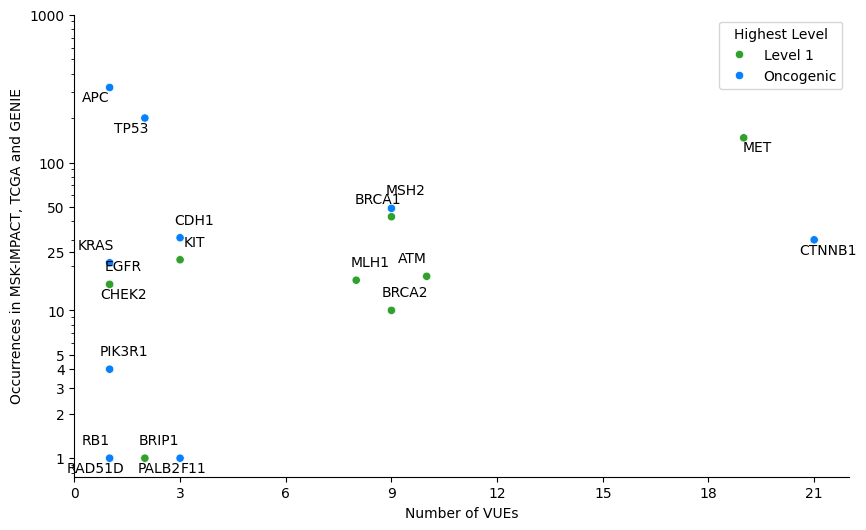

In [35]:
from matplotlib.ticker import MaxNLocator, LogLocator, ScalarFormatter

# Create the scatter plot
plt.figure(figsize=(10, 6))


palette = {"Level 1": "#30A12D", "Oncogenic": "#0780FE"}

scatter_plot = sns.scatterplot(data=grouped_df, x='Number of VUEs', y='total_variant_count', hue="Highest_Level", palette=palette)

# Despine the plot
sns.despine()

# Set x-axis to display integers only
scatter_plot.xaxis.set_major_locator(MaxNLocator(integer=True))
# Set y-axis to log scale
scatter_plot.set_yscale('log')
# Manually set y-axis ticks
scatter_plot.set_yticks([1, 2, 3, 4, 5, 10, 25, 50, 100, 1000])
scatter_plot.get_yaxis().set_major_formatter(ScalarFormatter())


# Add labels and title
scatter_plot.set_xlabel('Number of VUEs')
scatter_plot.set_ylabel('Occurrences in MSK-IMPACT, TCGA and GENIE')

# Reorder the legend handles and labels
handles, labels = scatter_plot.get_legend_handles_labels()
handles = [handles[1], handles[0]]  # Swap the order of handles
labels = [labels[1], labels[0]]  # Swap the order of labels
# Update the legend
scatter_plot.legend(handles, labels, title="Highest Level", loc="upper right")

# Add annotations for each point with gene symbols
texts = []
for i, row in grouped_df.iterrows():
    # Add some randomness to the initial text position
    x_offset = np.random.choice([10, -10])
    y_offset = np.random.choice([10, -10])
    texts.append(scatter_plot.annotate(row.name, 
                          (row['Number of VUEs'], row['total_variant_count']),
                          textcoords="offset points", xytext=(x_offset, y_offset), ha='center'))

# Show the plot
plt.show()

In [52]:
cancer_type_counts = pd.read_csv('./cancer_type_revue_counts.txt', sep='\t').groupby('Cancer Type')['Patient ID'].nunique()
cancer_type_counts.head()

Cancer Type
Acute myeloid leukemia       16
Adenocarcinoma In Situ        4
Adrenal Gland Cancer          2
Adrenocortical Adenoma        6
Adrenocortical Carcinoma    212
Name: Patient ID, dtype: int64

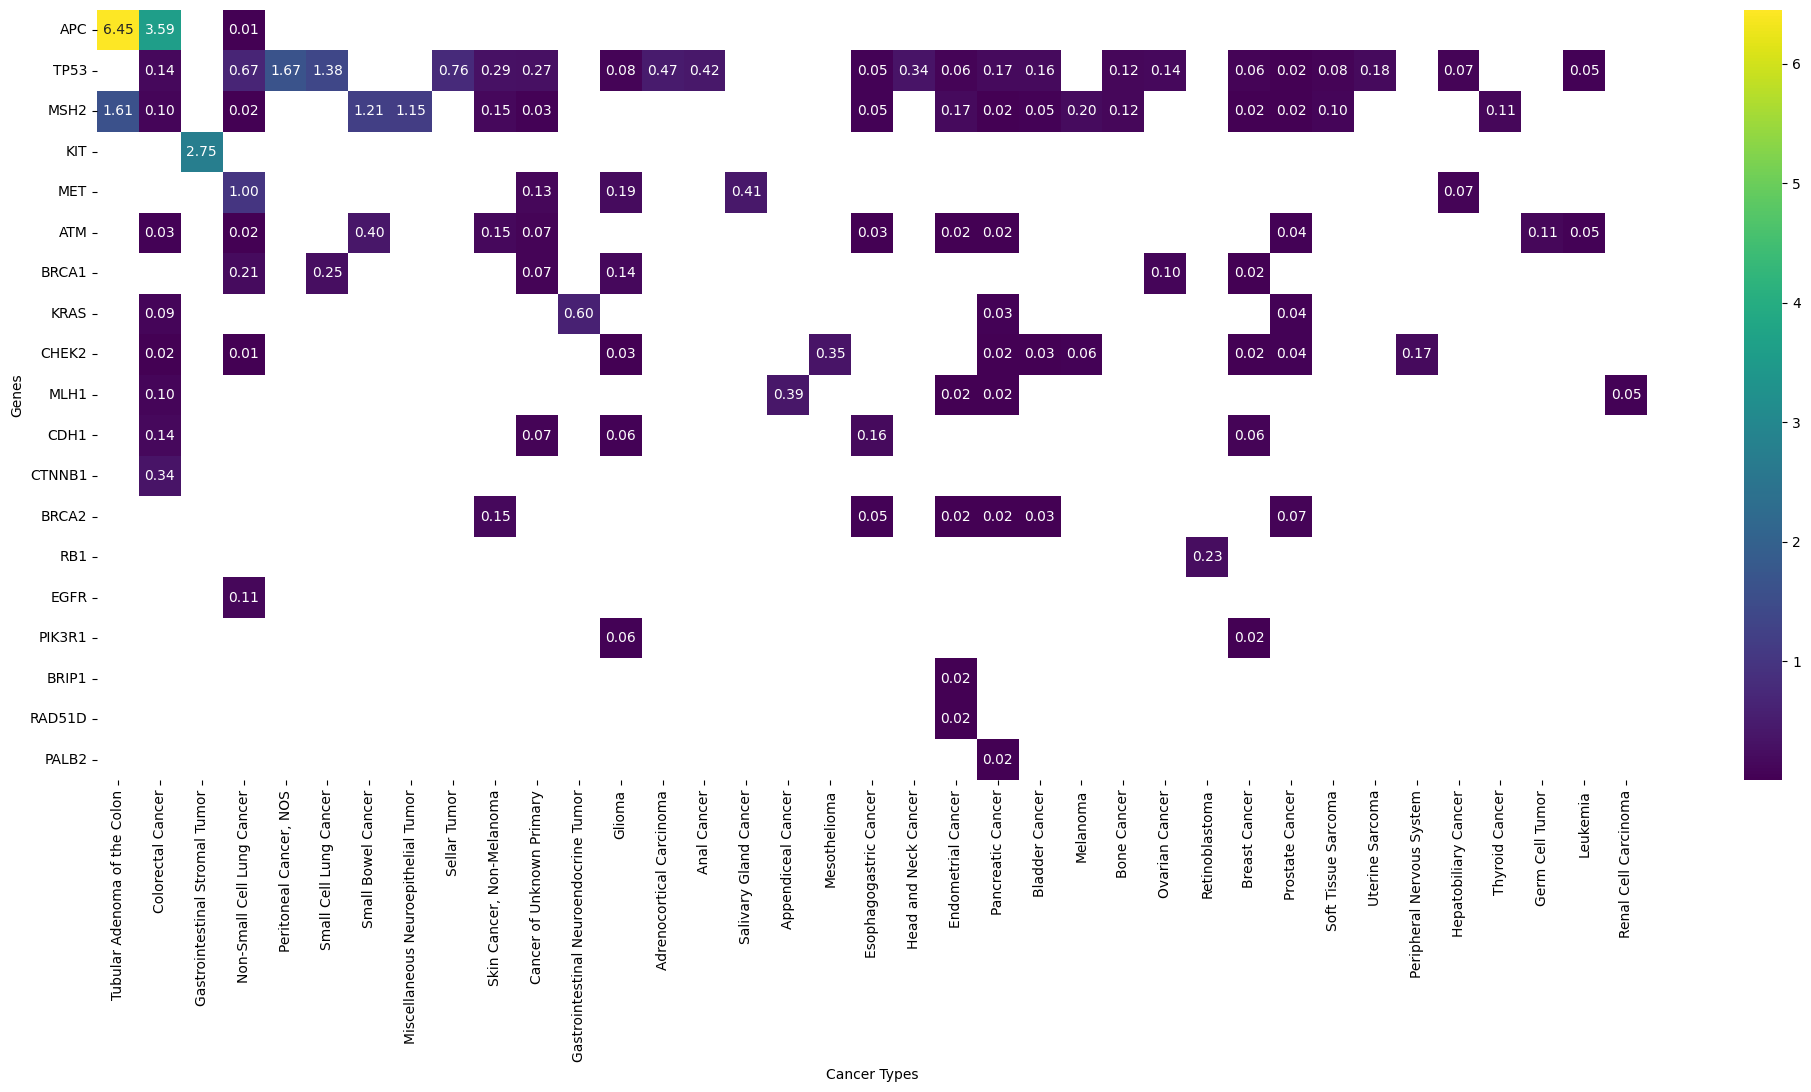

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming grouped_df is already created and contains the necessary data

# Extract the relevant columns for the heatmap
heatmap_data = grouped_df.filter(like='counts.CancerType')
heatmap_data.columns = [col.replace('counts.CancerType.', '') for col in heatmap_data.columns]

# Pivot the DataFrame to have genes as columns and cancer types as rows
heatmap_data = heatmap_data

# Filter out rows that sum up to 0
heatmap_data = heatmap_data.loc[heatmap_data.sum(axis=1) != 0]

# Normalize the counts by the total counts for each cancer type using cancer_type_counts
for col in heatmap_data.columns:
    heatmap_data[col] = heatmap_data[col] * 100.0 / cancer_type_counts.loc[col]

# Sort the rows and columns by the sum of their values
heatmap_data = heatmap_data.loc[heatmap_data.sum(axis=1).sort_values(ascending=False).index]
heatmap_data = heatmap_data[heatmap_data.sum(axis=0).sort_values(ascending=False).index]

# Create a mask for cells that are 0
mask = heatmap_data == 0

# Plot the heatmap
plt.figure(figsize=(25, 10))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='.2f', mask=mask)
# plt.title('Heatmap of Genes vs Cancer Types')
plt.xlabel('Cancer Types')
plt.ylabel('Genes')
plt.show()

In [23]:
(grouped_df['total_variant_count'] > 0).sum()

20

In [21]:
result_df['counts.'].head()

,counts.mskimpact_nonsignedout.somaticVariantsCountByCancerType.Glioma,counts.mskimpact.somaticVariantsCountByCancerType.Hepatobiliary Cancer,counts.genie.somaticVariantsCountByCancerType.Hepatobiliary Cancer,counts.mskimpact_nonsignedout.somaticVariantsCountByCancerType.Sellar Tumor,counts.mskimpact.germlineVariantsCount,counts.genie.somaticVariantsCountByCancerType.Prostate Cancer,counts.genie.unknownVariantsCountByCancerType.Non-Small Cell Lung Cancer,counts.genie.somaticVariantsCountByCancerType.Small Cell Lung Cancer,counts.mskimpact.somaticVariantsCountByCancerType.Small Bowel Cancer,counts.mskimpact.germlineVariantsCountByCancerType.Breast Cancer,...,counts.mskimpact_nonsignedout.somaticVariantsCountByCancerType.Prostate Cancer,counts.mskimpact.germlineVariantsCountByCancerType.Pancreatic Cancer,counts.mskimpact.germlineVariantsCountByCancerType.Germ Cell Tumor,counts.tcga.somaticVariantsCount,counts.genie.somaticVariantsCountByCancerType.Small Bowel Cancer,counts.mskimpact.somaticVariantsCountByCancerType.Gastrointestinal Neuroendocrine Tumor,counts.mskimpact_nonsignedout.somaticVariantsCountByCancerType.Head and Neck Cancer,variant,counts.mskimpact_nonsignedout.somaticVariantsCountByCancerType.Uterine Sarcoma,counts.mskimpact_nonsignedout.somaticVariantsCountByCancerType.Small Cell Lung Cancer
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4:g.55593576_55593606del,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4:g.55593580_55593606del,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4:g.55593578_55593606del,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,5:g.112151184A>G,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3:g.52439306A>G,0,0


In [8]:
# create input for mutationmapper tool

# Create new DataFrame with the specified columns
new_data = {
    'Sample_ID': [],
    'Cancer_Type': [],
    'Chromosome': [],
    'Start_Position': [],
    'End_Position': [],
    'Reference_Allele': [],
    'Variant_Allele': []
}

# Fill in the new DataFrame
for location in result_df['genomicLocation']:
    try:
        chrom, start, end, ref, alt = location.split(',')
    except ValueError:
        continue
    new_data['Sample_ID'].append(f'Sample_{np.random.randint(1, 1000)}')
    new_data['Cancer_Type'].append(np.random.choice(['Lung', 'Breast', 'Colon', 'Prostate', 'Leukemia']))
    new_data['Chromosome'].append(chrom)
    new_data['Start_Position'].append(start)
    new_data['End_Position'].append(end)
    new_data['Reference_Allele'].append(ref)
    new_data['Variant_Allele'].append(alt)

new_df = pd.DataFrame(new_data)

# Copy the new DataFrame for pasting into MutationMapperTool
new_df.to_clipboard(index=False)
